# 02 - Neural Network Classification with TensorFlow

**Content of this notebook :**
- Architecture of a classification model
- Input shapes and output shapes
    - `X` : features/data (inputs)
    - `y` : labels (outputs)
        - "What class do the inputs belong to?"
- Creating custom data to view and fit
- Steps in modelling for binary and multiclass classification
    - Creating a model
    - Compiling a model
        - Defining a loss function
        - Setting up an optimizer
            - Finding the best learning rate
        - Creating evaluation metrics
    - Fitting a model (getting it to find patterns in our data)
    - Improving a model
- The power of non-linearity
- Evaluating classification models
    - Visualizing the model
    - Looking at training curves
    - Compare predictions to ground truth

## What is a Classification problem?

A `classification problem` involves predicting whether something is one thing or another.

For example we might want to:
- Predict whether or not someone has heart disease based on their health parameters. This is called **binary classification** since there are only two options.
- Decide whether a photo is of food, a person or a dog. This is called **multi-class classification** sine there are more than two options.
- Predict what categories should be assigned to Wikipedia article. This is called **multi-label classification** since a single article could have more than one category assigned.

## Typical Architecture of neural network classification models with TensorFlow

| **Hyperparameter** | **Binary Classification** | **Multiclass Classification** |
| --- | --- | --- |
| Input layer shape | Same shape as number of features (e.g. 5 for age,sex,height,weight, smoking status in heart disease prediction) | Same as binary classification | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually ReLU (rectified linear unit) | Same as binary classification |
| Output activation | Sigmoid | Softmax |  
| Loss function | Cross entropy (`tf.keras.losses.BinaryCrossentropy` in TensorFlow) | Cross entropy (`tf.keras.losses.CategoricalCrossentropy` in TensorFlow) |
| Optimizer | SGD (stochastic gradient descent), Adam ... | Same as binary classification |

***Table 1:*** *Typical architecture of a classification network.* ***Source:*** *Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

In [1]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.0


## Creating and Viewing classification data

Let's creat a classification dataset using Scikit-Lean's `make_circles()` function.

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y  = make_circles(n_samples, noise = 0.03, random_state=42)

# Shapes
X.shape, y.shape

((1000, 2), (1000,))

In [4]:
# check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

> **Note:** One important step of starting any kind of machine learning project is to become one with the data. And one of the best ways to do this is to visualize the data we're working with as much as possible.

Let's create a DataFrame

In [6]:
# Make a dataframe of features and labels
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [7]:
# Check out the different labels
circles["label"].value_counts()

0    500
1    500
Name: label, dtype: int64

We are dealing with a **binary classification** problem. It's binary because there are only two labels (0 and 1).

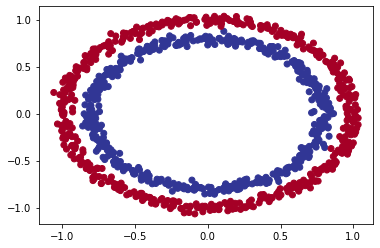

In [8]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

From the plot, we can guess that we want to build a model which classify blue or red dots. A model which is able to distinguish blue from red dots.

> **Note:** Check the website [TensorFlow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=2,2&seed=0.93799&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&regularizationRate_hide=true&batchSize_hide=true) and try adjusting different hyperparameters.

## Input and output shapes

One of the most common issues we'll run into building neural networks is shape mismatches. More specifically the shape of the input data and the shape of the output data.

In [9]:
# check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
# how many samples we're working with
len(X), len(y)

(1000, 1000)

In [11]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

Let's see how we'could build a neural network to model our data.

In TensorFlow, there are typically 3 fundamentals steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the `functional` or `sequential API`) or import a previously built model (transfer learning).
2. **Compiling a model** - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data

In [12]:
# set the random seed
tf.random.set_seed(42)

# Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 classes (0 & 1)
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

# fit the model
model_1.fit(X,y,epochs = 10)

Epoch 1/10
32/32 [==============================] - 1s 987us/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4820
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4990
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4950
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4840
Epoch 10/10
32/32 [==============================] - 0s 926us/step - loss: 0.6938 - accuracy: 0.4820


Looking at the accuracy metric, the model performs poorly (50% accuracy)

In [13]:
# Train our model for longer
model_1.fit(X,y, epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4990
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4870
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4690
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4860
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4640
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5020
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4980
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4810
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4790
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4800
Epoch 11/

In [14]:
# Evaluate our model (Not good here because we evaluate on our training data, We need to fit on training data on evaluate on testing data)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 874us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Even after 200 passes of the data it's still performing poorly. 

So let's add another layer to improve our model

In [15]:
# set random seed
tf.random.set_seed(42)

# Create a model with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

# fit the model
model_2.fit(X,y, epochs = 200)

Epoch 1/200
32/32 [==============================] - 0s 997us/step - loss: 1.8044 - accuracy: 0.5090
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 0.7235 - accuracy: 0.5030
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7145 - accuracy: 0.4950
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7078 - accuracy: 0.5010
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.5010
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.7008 - accuracy: 0.4960
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 0.7001 - accuracy: 0.4990
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6984 - accuracy: 0.4980
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.4960
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6962 - accuracy: 0.4920
Epoch 1

The accuracy is still 50%...

## Improving a model

To improve the model, we can alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here we can add more layers, increase the number of hidden units within each layer, change the activation functions of each layer.
2. **Compiling a model** - we can choose a different optimization function (such as Adam) or perhaps change the learning rate of the optimization function.
3. **Fitting a model** - we can perhaps fit a model for more epochs.

<center><img src="images/02-improving-a-model-from-model-perspective.png" width=650px></center>

Let's try the following modifications:
- add more neurons
- add an extra layer
- use the Adam optimizer

In [16]:
# set the random seed
tf.random.set_seed(42)

# Create the model (3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 neurons
    tf.keras.layers.Dense(10),  # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# Compile the model (using Adam)
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# fit the model
model_3.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 2.9658 - accuracy: 0.4490
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7229 - accuracy: 0.4390
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4620
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4750
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5040
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4480
Epoch 11/

Our model is still not doing better.

Let's make some visualizations to see what's happening.

> **Note:** Whenever your model is performing strangely or there's something going on with the data we are not quite sure of, remember to visualize! Inspect the data, the model and the model's predictions.

To visualize the model's predictions we're going to create a function `plot_decision_boundary()` which:
- Takes in a trained model, features `X` and labels `y`.
- Creates a meshgrid of the different `X` values.
- Makes predictions across the meshgrid.
- plots the predictions as well as a line between the different zones.

In [17]:
# import numpy
import numpy as np

In [18]:
def plot_decision_boundary(model,X,y):
    """
    Plots the decision boundary created by a model predicting on X.
    
    Inputs:
    - model - model trained
    - X - features from the dataset
    - y - labels from the dataset
    """

    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() -0.1, X[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                         np.linspace(y_min,y_max,100))

    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0])>1:
        print("doing multiclass classification...")

        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification...")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())

doing binary classification...


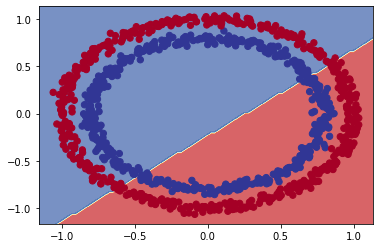

In [19]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

Looks like our model is trying to draw a straight line through the data.

What's wrong with doing this?

The main issue is our data isn't separable by a straight line. In a regression problem, our model might work. In fact, let's try it.

In [20]:
# let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = X + 100

# Split our regression data into training and test set
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train,axis=-1), y_reg_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_2" (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


We compiled our model for a binary classification problem. But we're now working on a regression problem, let's change the model to suit our data

In [21]:
# set the random seed
tf.random.set_seed(42)

# Create the model (3 layers)
model_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 neurons
    tf.keras.layers.Dense(10),  # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# Compile the model (using Adam)
model_reg.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

# fit the model
model_reg.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 5ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

In [22]:
# make some predictions on our regression problem
y_pred_reg = model_reg(X_reg_test, y_reg_test)

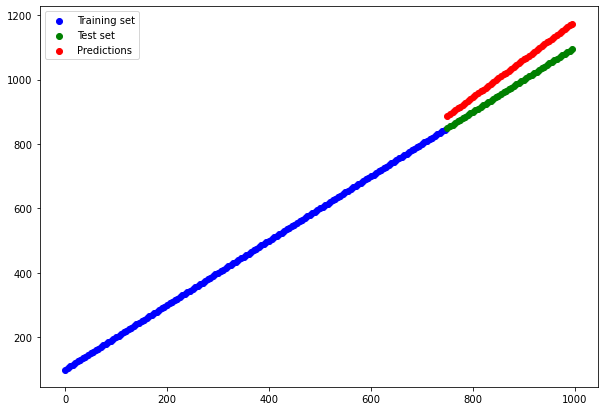

In [23]:
# Visualize the predictions
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train, color = "blue", label ="Training set")
plt.scatter(X_reg_test,y_reg_test, color = "green", label ="Test set")
plt.scatter(X_reg_test,y_pred_reg, color = "red", label ="Predictions")
plt.legend()
plt.show()

The predictions aren't perfet but they look better than the result of the classification problem. So this means our model must be learning something but we're missing out on four our classification problem.

## The missing piece : Non-linearity

We saw our neural network can model straight lines.

What about non-straight (non-linear) lines?

If we're going to model our classification data, we're going to need some non-linear lines.

> **Note:** Let's try to play around with the [TensorFlow Playground](https://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=1&seed=0.53965&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) and test a simple neural network with the activation function "linear". Then try other activation functions.

<center><img src="images/02-tensorflow-playground-simple-net-linear-activation.png" width=650px></center>


Let's Create the model we have in TensorFlow Playground using Keras. The main change we'll add to models we've built before is the use of the `activation` keyword.

In [24]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation= tf.keras.activations.linear), # activation function linear
    tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

# fit the model
history = model_4.fit(X,y,epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 910us/step - loss: 4.2380 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0223 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8296 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7654 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6464 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.4960 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.3803 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.2273 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8035 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 2.5701 - accuracy: 0.5000
Epoch 1

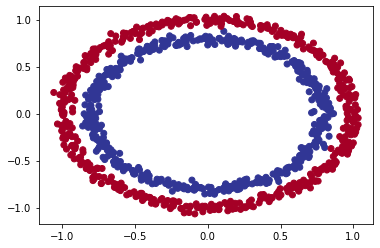

In [25]:
# Check out our data
plt.scatter(X[:,0],X[:,1],c=y, cmap = plt.cm.RdYlBu)

doing binary classification...


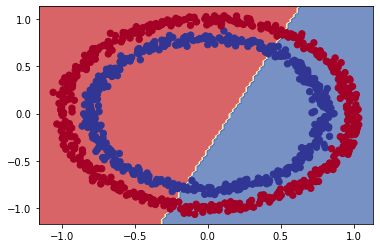

In [26]:
# Check the decision boundary fou our latest model
plot_decision_boundary(model_4, X, y)

Well, it looks like we're getting a straight (linear) line prediction again. But our data is non-linear. 

What we're going to have to do is add some non-linearity to our model. 

To do so, we'll us the `activation` parameter in our layers.

Let's try to build a model with a non-linear activation function

In [27]:
# set random seed
tf.random.set_seed(42)

# create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])

# Fit the model
history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 977us/step - loss: 1.8377 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 1.4449 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3410 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2678 - accuracy: 0.4770
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2116 - accuracy: 0.4390
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1664 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1294 - accuracy: 0.4250
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0970 - accuracy: 0.4420
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0670 - accuracy: 0.4540
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0407 - accuracy: 0.4550
Epoch 1

Still not learning...

Let's try to increase the number of neurons and layers in our model. Let's try:
- 2 hidden layers with `ReLU` (rectified linear unit)
- 4 neurons per layer

Te see this network in action, check out [TensorFlow Playground demo](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.53965&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)


<center><img src="images/02-tensorflow-playground-two-layer-net-relu-activation.png" width=650px></center>



In [28]:
# set random seed
tf.random.set_seed(42)

# Create a model 
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])

# Fit the model
history = model_6.fit(X,y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 899us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 1

doing binary classification...


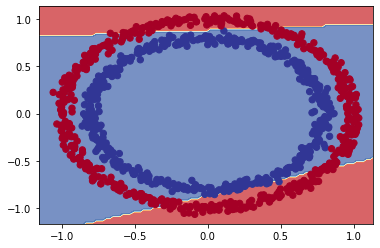

In [35]:
# plot the predictions
plot_decision_boundary(model_6,X,y)

It seems like our model is the same as the one in the TensorFlow Playground but our model is still drawing straight lines...

This time we'll change the activation function on our output layer too. Remember the architecture of a classification model : For binary classification, the output layer activations is usually the `Sigmoid activation function`.

In [29]:
# set random seed
tf.random.set_seed(42)

# create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit
model_7.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 965us/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 945us/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 933us/step - loss: 0.6766 - accuracy: 0.5510
Epo

It looks like our model is getting some incredible results!

doing binary classification...


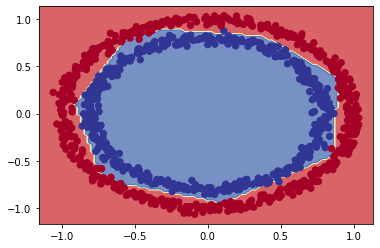

In [30]:
# Plot the decision boundary
plot_decision_boundary(model_7,X,y)

It looks like our model is almost perfectly separating the two circles.

> **Question:** What's wrong with the predictions we've made? Are we really evaluating our model correctly here? Hint: what data did the model learn on and what did we predict on?

- We've been evaluating our model on the same data it was trained on.

> **Note:** The combination of **linear (straight lines) and non-linear (non(straight lines) functions** is one of the key fundamentals of neural networks.

### Activation Functions

In [31]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

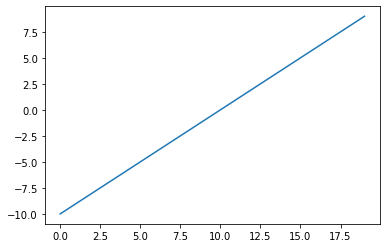

In [32]:
# Visualize our toy tensor
plt.plot(A)

Let's recreae the `sigmoid function` and see what it does to our data.

In [33]:
# sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

In [34]:
# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

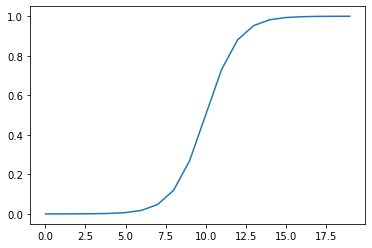

In [35]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

How about the `ReLU function` (ReLU turns all negatives to 0 and positive numbers stay the same)

In [36]:
# relu 
def relu(x):

    return tf.maximum(0,x)

In [37]:
# Use the relu function on our toy tensor
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

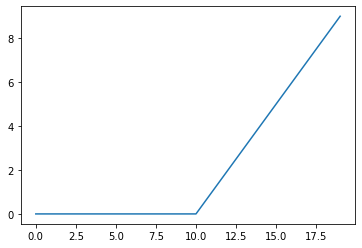

In [38]:
# Plot our toy tensor transformed by relu
plt.plot(relu(A))

How about TensorFlow's `linear activation function`

In [39]:
# Linear
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [40]:
# Does the linear activation change anything?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification model

In the previous models, we've been evaluating our model on the same data it was trained on. 

A better approach would be to split our data into training, validation (optional) and test sets.

Once we've done that, we'll train our model on the training set and then see how well it learned the patterns by using it to predict values on the test set.

In [41]:
# Check how many examples we have
len(X)

1000

In [42]:
# Split data into train and test sets
X_train , y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

# Shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

Great, now we've got training and test sets, let's model the training data and evaluate what our model has learned on the test set.

In [43]:
# set seed
tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile
model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics = ["accuracy"])

# Fit
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 942us/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 965us/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 926us/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 886us/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 976us/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/

In [44]:
# Evaluate the model on the test set
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set {loss : .2f}")
print(f"Model accuracy on the test set {100 * accuracy : .2f}%")

7/7 [==============================] - 0s 972us/step - loss: 0.1247 - accuracy: 1.0000
Model loss on the test set  0.12
Model accuracy on the test set  100.00%


doing binary classification...
doing binary classification...


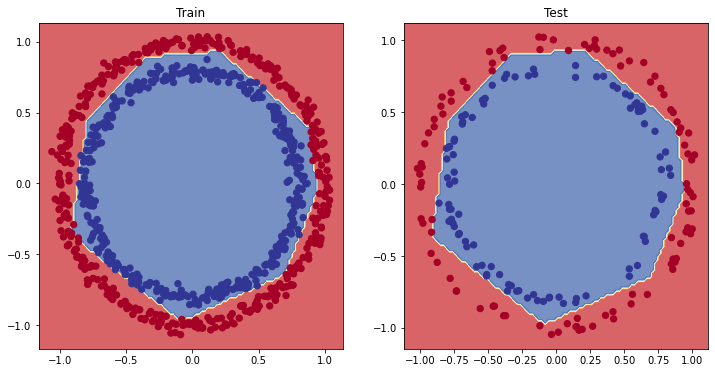

In [45]:
# plot the decision boudaries for the training and test sets
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X_test,y_test)
plt.show()

99.50% accuracy great! 

We change a few things in our model in order to obtain this result:
- **The `activation` parameter** - We used `"relu"` & `"sigmoid"` 
- **The `learning_rate` parameter (also `lr`)** - we increased the **learning rate** parameter in the `Adam optimizer` to `0.01`
    - You can think of the learning rate as how quickly a model learns. The higher the learning rate, the faster the model's capacity to learn, however, there's such a thing as a too high learning rate, where a model tries to learn too fast and doesn't learn anything.
- **The number of epochs** - We lowered the number of epochs from 100 to 25 but our model still got an incredible result on both the training and test sets.
    - One of the reasons our model performed well in even less epochs than before is because we increased the learning rate.

### Plot the loss curves

Looking at the plots above, we can see the outputs of our model are very good. But how did our model go whilst it was learning?

To figure this out, we can check the **loss curves** (also referred to as the **learning curves**).

In [46]:
# You can access the information in the history variable
history.history

{'loss': [0.6846511960029602,
  0.6777210235595703,
  0.6735944151878357,
  0.6681485772132874,
  0.6632686853408813,
  0.6545671820640564,
  0.6412575244903564,
  0.6264280676841736,
  0.6038310527801514,
  0.5714035630226135,
  0.540442943572998,
  0.5015039443969727,
  0.468331903219223,
  0.4113016128540039,
  0.3625060021877289,
  0.32090437412261963,
  0.28470802307128906,
  0.25971999764442444,
  0.23746901750564575,
  0.21351958811283112,
  0.1938202828168869,
  0.17524370551109314,
  0.16189303994178772,
  0.1549890786409378,
  0.14897286891937256],
 'accuracy': [0.5425000190734863,
  0.5525000095367432,
  0.5512499809265137,
  0.5774999856948853,
  0.5849999785423279,
  0.5837500095367432,
  0.675000011920929,
  0.7012500166893005,
  0.7487499713897705,
  0.7737500071525574,
  0.7649999856948853,
  0.7837499976158142,
  0.7975000143051147,
  0.8450000286102295,
  0.9125000238418579,
  0.9312499761581421,
  0.9487500190734863,
  0.9524999856948853,
  0.956250011920929,
  0.966

In [47]:
# convert into a dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673594,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


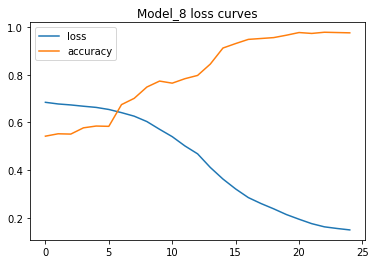

In [48]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")
plt.show()

> **Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

### Finding the best learning rate

Aside from the architecture itself (the layers, number of neurons, activations, etc), the most important hyperparameter you can tune for your neural network models is the **learning rate**.

In `model_8` we saw we lowered the Adam optimizer's learning rate from the default of `0.001` to `0.01`. We changed this value to see how the model went. Build a model of machine learning or Deep learning is very experimental. We try different values of hyperparameters and different architecture of neural network and we evaluate it to find the best configuration.

To find the optimal learning rate for our models we are going to use the following steps:

- A **learning rate callback**
    - you can thing of a callback as an extra piece of functionality you can add to your model while its training.
- Another model
- A modified loss curves plot.

> **Note:** The default hyperparameters of many neural network building blocks in TensorFlow are setup in a way which usually work right out of the box (e.g. the **Adam optimizer's** default settings can usually get good results on many datasets). So it's a good idea to try the defaults first, then adjust as needed.

In [49]:
# set seed
tf.random.set_seed(42)

# create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# compile
model_9.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# fit the model
history_9 = model_9.fit(X_train, y_train, epochs = 100, callbacks = [lr_scheduler])


Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

<AxesSubplot:xlabel='epochs'>

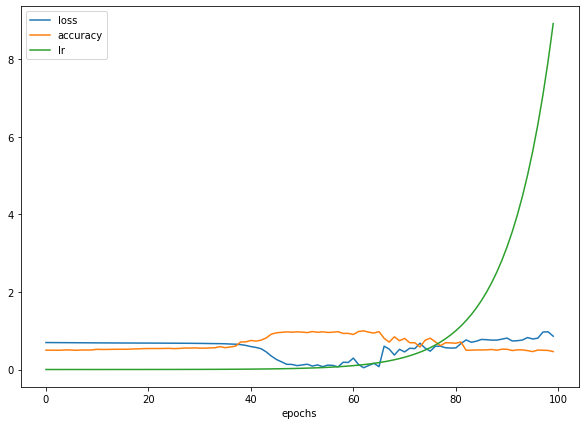

In [50]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs")

As we can see the learning rate exponentially increases as the number of epochs increases.

And we can see the model's accuracy goes up (and loss goes down) at a specific point when the learning rate slowly increases.

To figure out where this infliction point is, we can plot the loss versus the log-scale learning rate.

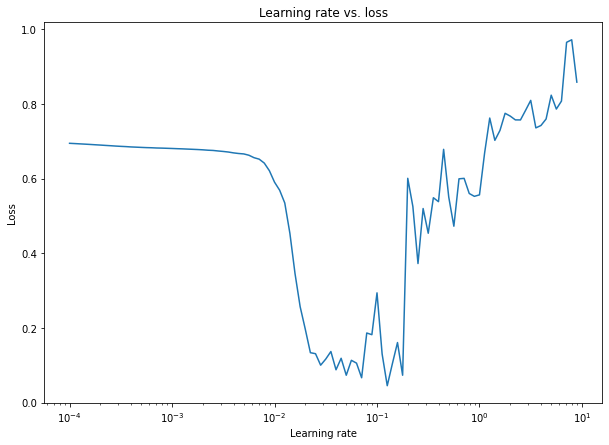

In [55]:
# plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")
plt.show()

To figure out the ideal value of the learning rate (at least the ideal value to begin training our model), the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of curve).

In this case, our ideal learning rate ends up between `0.01` and `0.02`.

<center><img src="images/02-learning-rate-vs-loss.png" width = 650px></center>

In [58]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 10**-4

(1, 0.1, 0.01, 0.001, 0.0001)

Now we've estimated the ideal learning rate (we'll use 0.02) for our model, let's refit it.

In [59]:
# set random seed
tf.random.set_seed(42)

# create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# compile the model
model_10.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# fit the model
history_10 = model_10.fit(X_train,y_train,epochs = 20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 5ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 4ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 4ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

Nice ! With a little higher learning rate (`0.02` instead of `0.01`) we reach a higher accuracy than `model_8` in less epochs (`20` instead of `25`)

In [61]:
# Evaluate model 8
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

In [60]:
# Evaluate model 10 on the test set
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 1s 4ms/step - loss: 0.0574 - accuracy: 0.9900


[0.057401832193136215, 0.9900000095367432]

doing binary classification...
doing binary classification...


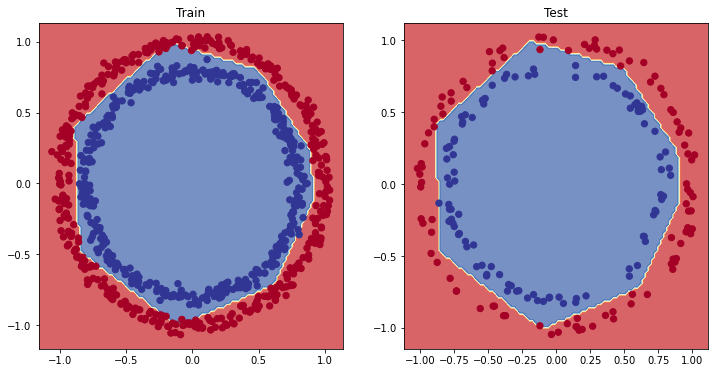

In [64]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,X_test,y_test)
plt.show()

### More classification evaluation methods

Alongside the visualizations we've been making, there are a numbe of different evaluation metrics we can use to evaluate a classification model.

| **Metric name/Evaluation method** | **Definition** | **Formula** | **Code**|
| ---- | ---- | ---- | ---- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it get 95/100 predictions correct | $$Accuracy = \frac{tp+tn}{tp+tn+fp+fn}$$ | `sklearn.metrics.accuracy_score()` or `tf.keras.metrics.Accuracy()` |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives | $$Precision = \frac{tp}{tp+fp}$$ | `sklearn.metrics.precision_score()` or `tf.keras.metrics.Precision()` |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives.  | $$Recall = \frac{tp}{tp+fn}$$  | `sklearn.metrics.recall_score()` or `tf.keras.metrics.Recall()` |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. |  $$F1-score = 2 * \frac{precision * recall}{precision+recall}$$ | `sklearn.metrics.f1_score()` |
| Confusion matrix | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | NA | `sklearn.metrics.confusion_matrix()` |

Because we passed `["accuracy"]` to the `metrics` parameter when we compiled the model, calling evaluate() on it will return the loss as well as accuracy.

In [ ]:
# Check out the accuracy of our model
